**Last Updated**: *18 April 2025*

**CD/Non-CD Stats**
   - Inspect elevation range and steepest slope in windows of 50m x 50m 
   - Layers:
      - centroids + 4 random points in train_CDs
      - 10 000 random points outside of train_CDs
      - DTM rescaled at 5m
      - Slope rescaled at 5m

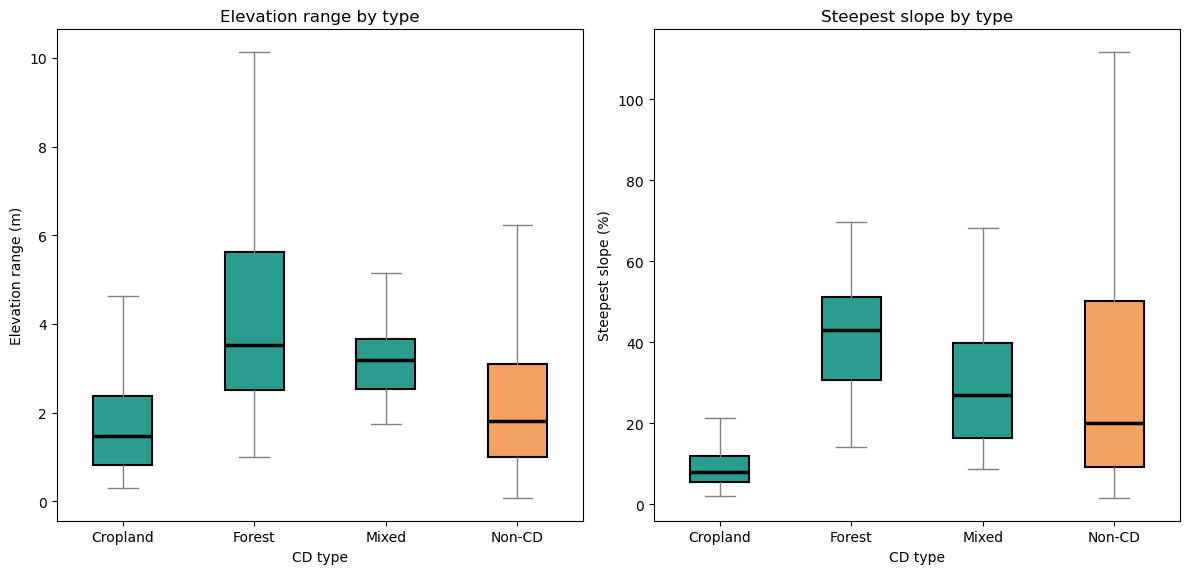

In [1]:
# === Boxplot elevation range and steepest slope ===

# Modules
import pandas as pd
import matplotlib.pyplot as plt

# Load stats
file_path = 'Data/train_statistics.csv'  
df = pd.read_csv(file_path)
colors = ['#2a9d8f', '#2a9d8f', '#2a9d8f', '#f4a261']
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Elevation range
box1 = df.boxplot(column='dem_range', by='type', ax=axes[0], grid=False, patch_artist=True, return_type='dict', showfliers=False)

for i, patch in enumerate(box1['dem_range']['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for line in box1['dem_range']['medians']:
    line.set_color('black')
    line.set_linewidth(2.5)

for line in box1['dem_range']['whiskers'] + box1['dem_range']['caps']:
    line.set_color('gray')
    line.set_linewidth(1)

for flier in box1['dem_range']['fliers']:
    flier.set(marker='o', color='orangered', alpha=0.7, markersize=6)

axes[0].set_title('Elevation range by type')
axes[0].set_xlabel('CD type')
axes[0].set_ylabel('Elevation range (m)')

# Steepest slope
box2 = df.boxplot(column='slope_max', by='type', ax=axes[1], grid=False, patch_artist=True, return_type='dict', showfliers=False)

for i, patch in enumerate(box2['slope_max']['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for line in box2['slope_max']['medians']:
    line.set_color('black')
    line.set_linewidth(2.5)

for line in box2['slope_max']['whiskers'] + box2['slope_max']['caps']:
    line.set_color('gray')
    line.set_linewidth(1)

for flier in box2['slope_max']['fliers']:
    flier.set(marker='o', color='orangered', alpha=0.7, markersize=6)

axes[1].set_title('Steepest slope by type')
axes[1].set_xlabel('CD type')
axes[1].set_ylabel('Steepest slope (%)')

# Secondary Y-axis for normalized values
def add_normalized_axis(ax, original_col):
    
    min_val = df[original_col].min()
    max_val = df[original_col].max()

    def norm_to_orig(y):
        return y * (max_val - min_val) + min_val

    def orig_to_norm(y):
        return (y - min_val) / (max_val - min_val)

    secax = ax.secondary_yaxis('right', functions=(orig_to_norm, norm_to_orig))
    secax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    secax.tick_params(axis='y', colors='gray')

#add_normalized_axis(axes[0], 'dem_range')
#add_normalized_axis(axes[1], 'slope_max')

plt.suptitle('')
plt.tight_layout()
plt.show()